# Machine Learning in Python - CIFAR-10 SOLUTION

Based on a CNN CIFAR-10 solution from https://raw.githubusercontent.com/keras-team/keras/master/examples/cifar10_cnn.py

In [1]:
#import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import rmsprop

import matplotlib.pyplot as plt
from scipy.misc import toimage

from sklearn import metrics

import pandas as pd
import numpy as np

from IPython.display import display, HTML, Image
from IPython.display import SVG

from PIL import Image

import os
from random import randint


Using TensorFlow backend.


Prepare the data

In [2]:
num_classes = 10
classes = {0:"airplane", 1:"automobile", 2:"bird",3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

cat


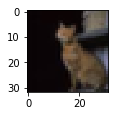

frog


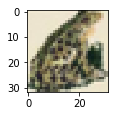

automobile


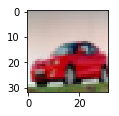

ship


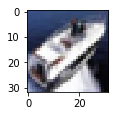

deer


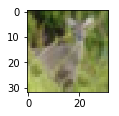

cat


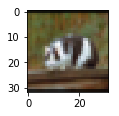

cat


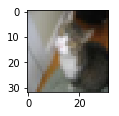

cat


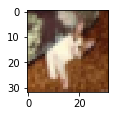

airplane


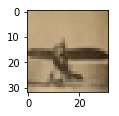

In [3]:
# create a some images
for i in range(0, 9):
    
    plt.figure(figsize=(1.5, 1.5))
    i_rand = randint(0, x_train.shape[0])
    print(classes[y_train[i_rand][0]])
    plt.imshow(Image.fromarray(x_train[i_rand]))
    plt.show()

### Simple Feed-forward model

Reshape the data

In [6]:
y_train.shape[0]
y_train.shape[1]

1

In [8]:
y_train.shape

(50000, 1)

In [9]:
x_train_flat = x_train.reshape(x_train.shape[0], 3072)
x_test_flat = x_test.reshape(x_test.shape[0], 3072)

x_train_flat = x_train_flat.astype('float32')
x_test_flat = x_test_flat.astype('float32')
x_train_flat /= 255
x_test_flat /= 255

y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

y_train_wide = to_categorical(y_train, num_classes)
y_test_wide = to_categorical(y_test, num_classes)

In [10]:
model = Sequential()
model.add(Dense(input_dim=3072, units=1000))
model.add(Activation("relu"))
model.add(Dense(units=512))
model.add(Activation("relu"))
model.add(Dense(units=256))
model.add(Activation("relu"))
model.add(Dense(units=10))
model.add(Activation("softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
activation_1 (Activation)    (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               512512    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
__________

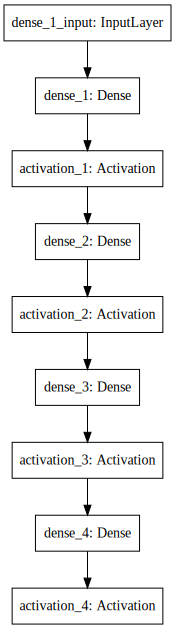

In [11]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(x_train_flat, y_train_wide, \
          epochs=10, batch_size=32, verbose=1)
# The initial solution is epochs = 20 
# model.fit(x_train_flat, y_train_wide, \
#           epochs=10, batch_size=32, verbose=1)

Epoch 1/10
50000/50000 [==============================] - 68s 1ms/step - loss: 1.8975 - acc: 0.3071
Epoch 2/10
50000/50000 [==============================] - 69s 1ms/step - loss: 1.7223 - acc: 0.3830
Epoch 3/10
50000/50000 [==============================] - ETA: 0s - loss: 1.6544 - acc: 0.414 - 67s 1ms/step - loss: 1.6543 - acc: 0.4142
Epoch 4/10
50000/50000 [==============================] - 63s 1ms/step - loss: 1.6145 - acc: 0.4246
Epoch 5/10
50000/50000 [==============================] - 63s 1ms/step - loss: 1.5949 - acc: 0.4349
Epoch 6/10
50000/50000 [==============================] - 62s 1ms/step - loss: 1.5832 - acc: 0.4417
Epoch 7/10
50000/50000 [==============================] - 63s 1ms/step - loss: 1.5699 - acc: 0.4451
Epoch 8/10
50000/50000 [==============================] - 63s 1ms/step - loss: 1.5611 - acc: 0.4508
Epoch 9/10
50000/50000 [==============================] - 68s 1ms/step - loss: 1.5526 - acc: 0.4528
Epoch 10/10
50000/50000 [==============================] - 67s

Evaluate the model

In [ ]:
print("******** Training Data ********")
# Make a set of predictions for the training data
y_pred = model.predict_classes(x_train_flat, batch_size=32)

# Print performance details
print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))



print("****** Test Data ********")

# Make a set of predictions for the validation data
y_pred = model.predict_classes(x_test_flat)

# Print performance details
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

### Convolutional model

Load in the data again as we need to keep it in image shape

In [18]:
# Note to compare with the pre-processing in 
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

y_train_wide = to_categorical(y_train, num_classes)
y_test_wide = to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Define model structure

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
__________

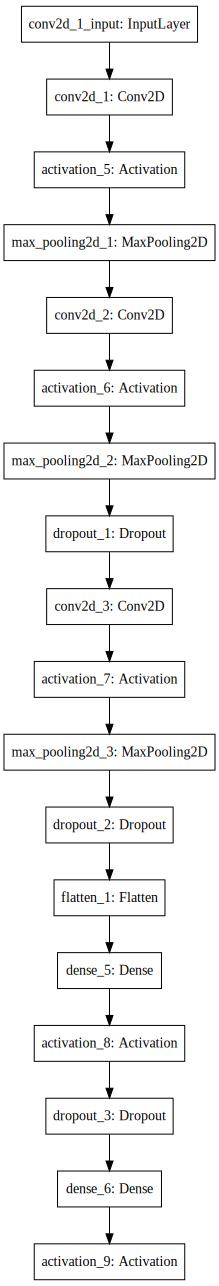

In [20]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [21]:
# initiate RMSprop optimizer
opt = rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Train the model

In [22]:
model.fit(x_train, y_train_wide,
          batch_size=128,
          epochs=5,
          shuffle=True)

Epoch 1/5
50000/50000 [==============================] - 117s 2ms/step - loss: 2.0371 - acc: 0.2450
Epoch 2/5
50000/50000 [==============================] - 122s 2ms/step - loss: 1.7349 - acc: 0.3658
Epoch 3/5
50000/50000 [==============================] - 118s 2ms/step - loss: 1.6052 - acc: 0.4123
Epoch 4/5
50000/50000 [==============================] - 109s 2ms/step - loss: 1.5279 - acc: 0.4426
Epoch 5/5
50000/50000 [==============================] - 109s 2ms/step - loss: 1.4697 - acc: 0.4660


In [24]:
print("******** Training Data ********")
# Make a set of predictions for the training data
y_pred = model.predict_classes(x_train, batch_size=32)

# Print performance details
print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))


print("****** Test Data ********")

# Make a set of predictions for the validation data
y_pred = model.predict_classes(x_test)

# Print performance details
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

******** Training Data ********
             precision    recall  f1-score   support

          0       0.61      0.44      0.52      5000
          1       0.71      0.51      0.59      5000
          2       0.38      0.31      0.35      5000
          3       0.37      0.43      0.39      5000
          4       0.41      0.46      0.43      5000
          5       0.44      0.48      0.46      5000
          6       0.53      0.60      0.56      5000
          7       0.51      0.59      0.54      5000
          8       0.64      0.58      0.61      5000
          9       0.54      0.64      0.59      5000

avg / total       0.51      0.50      0.50     50000

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,2224,197,546,210,172,85,111,241,851,363,5000
1,149,2552,56,141,40,32,269,217,313,1231,5000
2,227,38,1572,504,1136,528,419,379,90,107,5000
3,36,22,358,2135,292,1179,469,334,40,135,5000
4,130,25,523,400,2280,348,562,618,41,73,5000
5,7,19,340,1125,324,2410,239,470,17,49,5000
6,5,33,211,607,731,144,2984,155,25,105,5000
7,27,14,165,397,544,545,190,2926,27,165,5000
8,676,270,247,138,51,106,66,76,2914,456,5000


****** Test Data ********
             precision    recall  f1-score   support

          0       0.63      0.45      0.53      1000
          1       0.72      0.51      0.60      1000
          2       0.34      0.30      0.32      1000
          3       0.35      0.40      0.37      1000
          4       0.42      0.44      0.43      1000
          5       0.45      0.49      0.47      1000
          6       0.54      0.61      0.57      1000
          7       0.52      0.61      0.56      1000
          8       0.62      0.58      0.60      1000
          9       0.55      0.62      0.58      1000

avg / total       0.51      0.50      0.50     10000

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,454,31,121,41,24,14,26,41,170,78,1000
1,26,514,19,27,9,6,44,39,65,251,1000
2,50,4,299,114,221,113,86,71,20,22,1000
3,6,12,81,400,71,234,91,79,5,21,1000
4,20,5,116,91,441,69,123,119,9,7,1000
5,3,4,85,203,57,494,43,94,8,9,1000
6,1,4,45,120,135,29,611,31,5,19,1000
7,7,1,28,88,89,119,27,607,7,27,1000
8,125,61,57,28,5,14,18,25,581,86,1000


Score some test data

In [25]:
# Score trained model.
scores = model.evaluate(x_test, y_test_wide, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
scores

10000/10000 [==============================] - 7s 727us/step
Test loss: 1.40734716568
Test accuracy: 0.5025


[1.4073471656799317, 0.50249999999999995]